In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os

# Maximum per channel for all the files

In [2]:
file_dir = '../data/extracted'
file_names = [
    'Ntuple_runsampic_159_runtelescope_636.npz',
    'Ntuple_runsampic_160_runtelescope_637.npz',
    'Ntuple_runsampic_161_runtelescope_638.npz',
    'Ntuple_runsampic_163_runtelescope_640.npz',
    'Ntuple_runsampic_164_runtelescope_641.npz',
    'Ntuple_runsampic_165_runtelescope_642.npz',
    'Ntuple_runsampic_166_runtelescope_643.npz',
    'Ntuple_runsampic_168_runtelescope_646.npz',
    'Ntuple_runsampic_169_runtelescope_648.npz',
    'Ntuple_runsampic_171_runtelescope_650.npz',
    'Ntuple_runsampic_172_runtelescope_651.npz'
]

In [3]:
file_channel_events = []
for file_name in file_names:
    print(f'Loading {file_name} ...')
    file_channel_events.append(np.load(file_dir + '/' + file_name, allow_pickle=True)['arr_0'].flat[0])

channels = sorted(file_channel_events[0].keys())

Loading Ntuple_runsampic_159_runtelescope_636.npz ...
Loading Ntuple_runsampic_160_runtelescope_637.npz ...
Loading Ntuple_runsampic_161_runtelescope_638.npz ...
Loading Ntuple_runsampic_163_runtelescope_640.npz ...
Loading Ntuple_runsampic_164_runtelescope_641.npz ...
Loading Ntuple_runsampic_165_runtelescope_642.npz ...
Loading Ntuple_runsampic_166_runtelescope_643.npz ...
Loading Ntuple_runsampic_168_runtelescope_646.npz ...
Loading Ntuple_runsampic_169_runtelescope_648.npz ...
Loading Ntuple_runsampic_171_runtelescope_650.npz ...
Loading Ntuple_runsampic_172_runtelescope_651.npz ...


In [11]:
def plot_max_channel_hist(X, n_bins=100, title=None, ylim=None):
    X = np.max(X, axis=1)
    counts, bins, _ = plt.hist(X, bins=n_bins, range=(0, 1))
    plt.title(title)
    plt.xlim(-0.05, 1.05)
    if ylim is not None:
        if ylim == 'auto':
            plt.ylim(0, np.max(counts) + 50)
        else:
            plt.ylim(0, ylim)

Channel 8


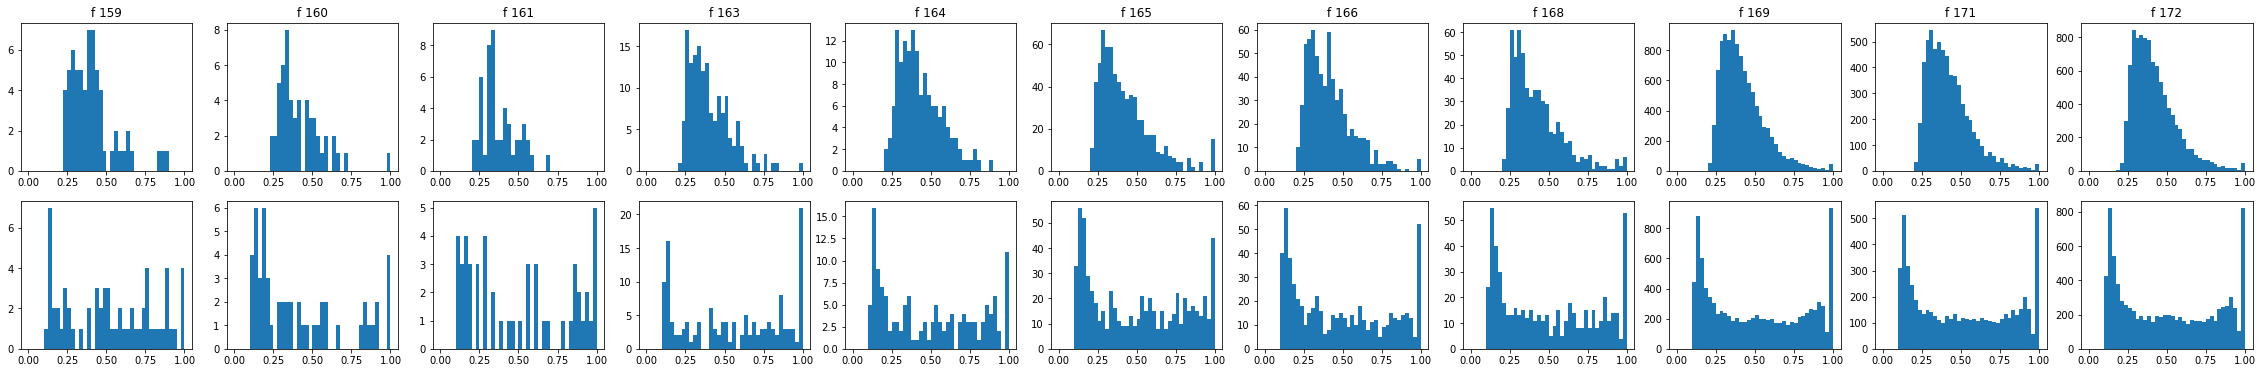

Channel 9


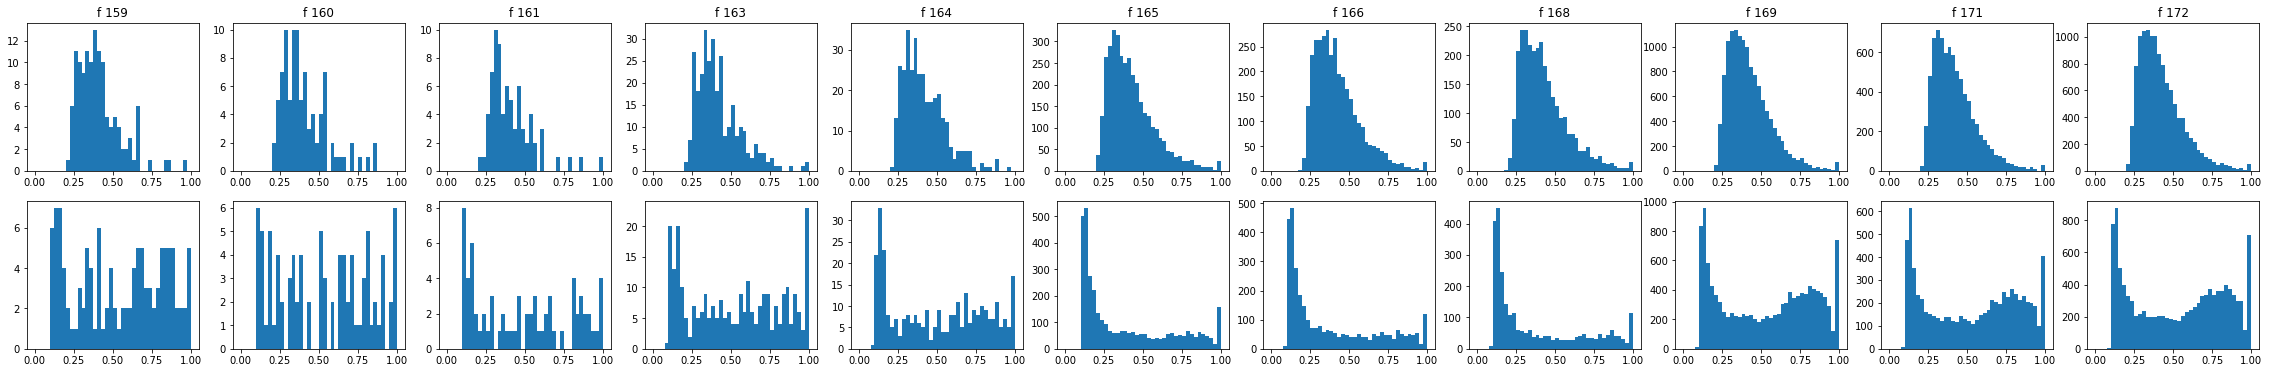

Channel 10


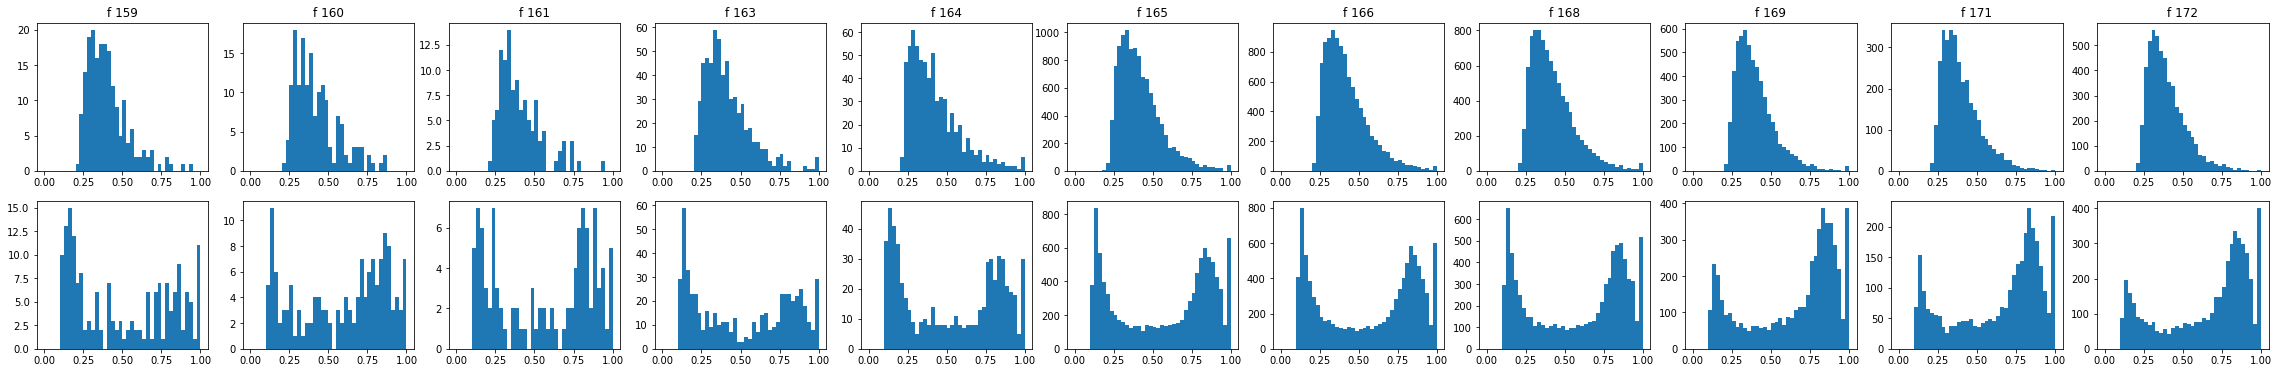

Channel 11


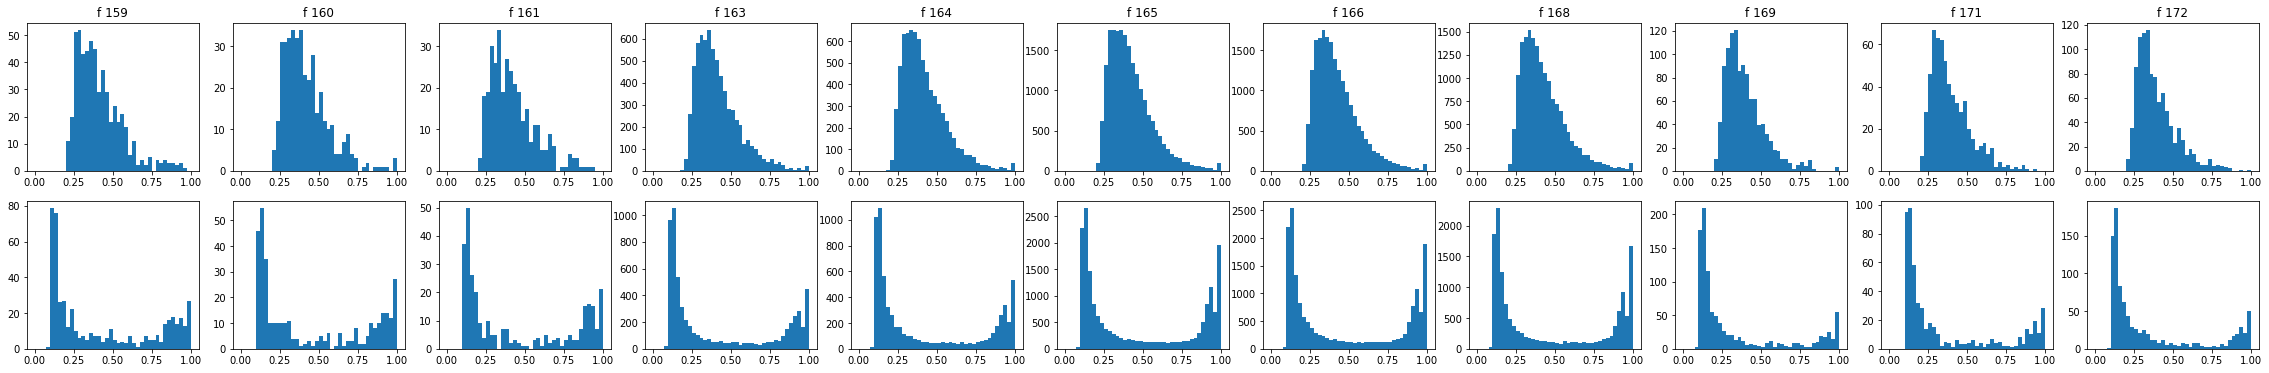

Channel 12


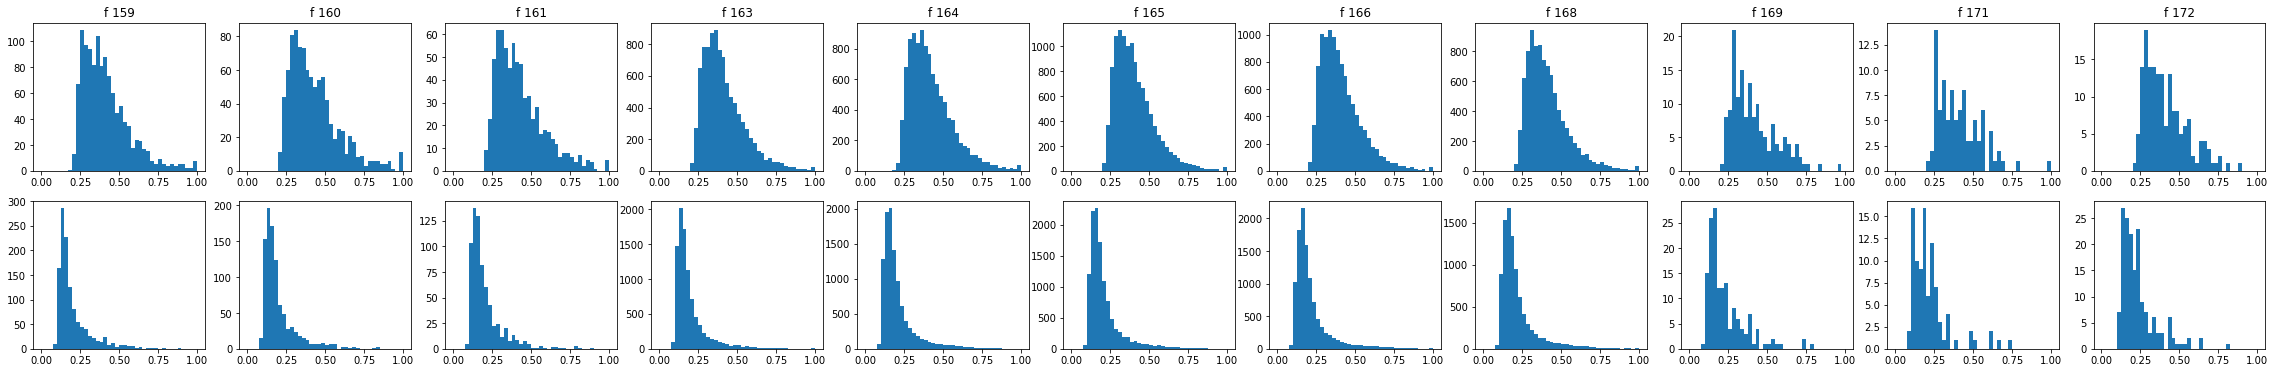

Channel 13


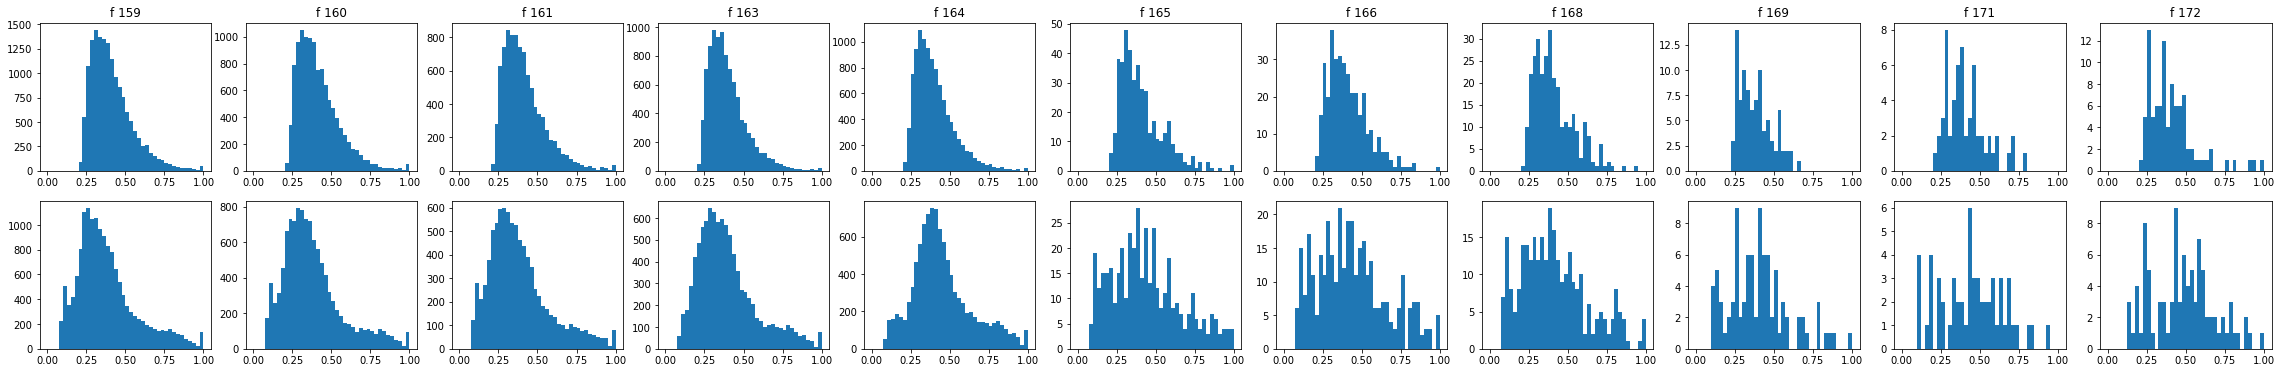

Channel 14


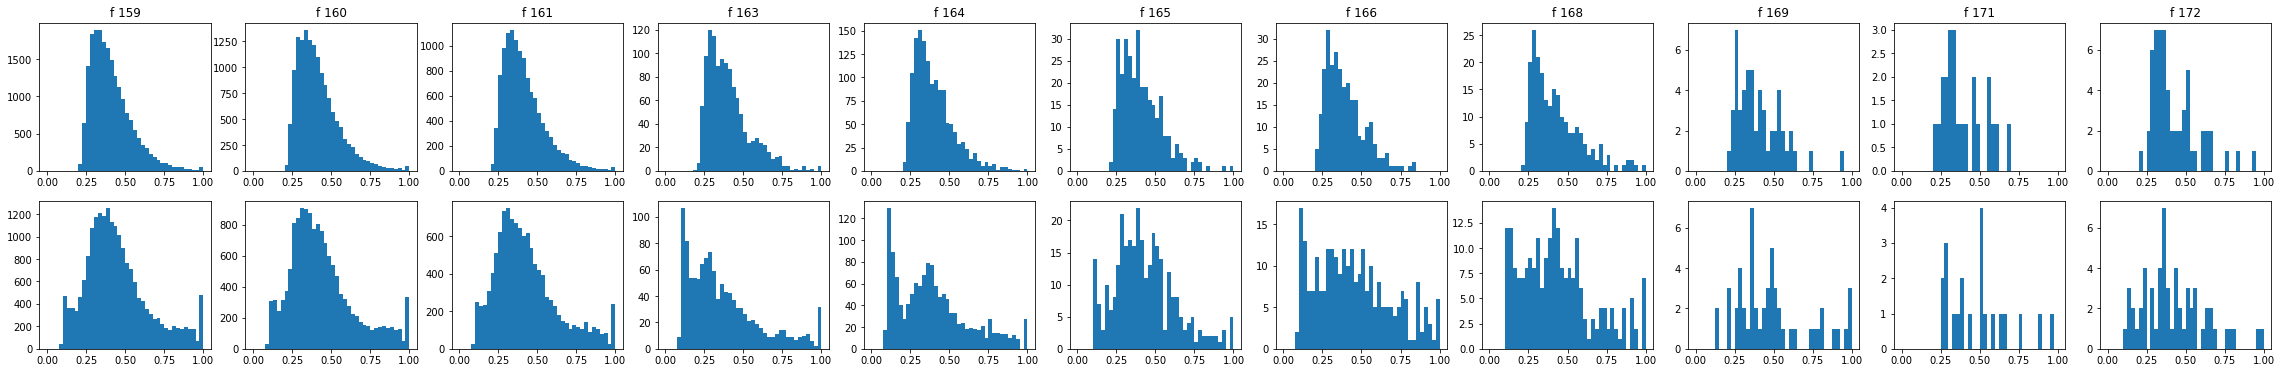

Channel 15


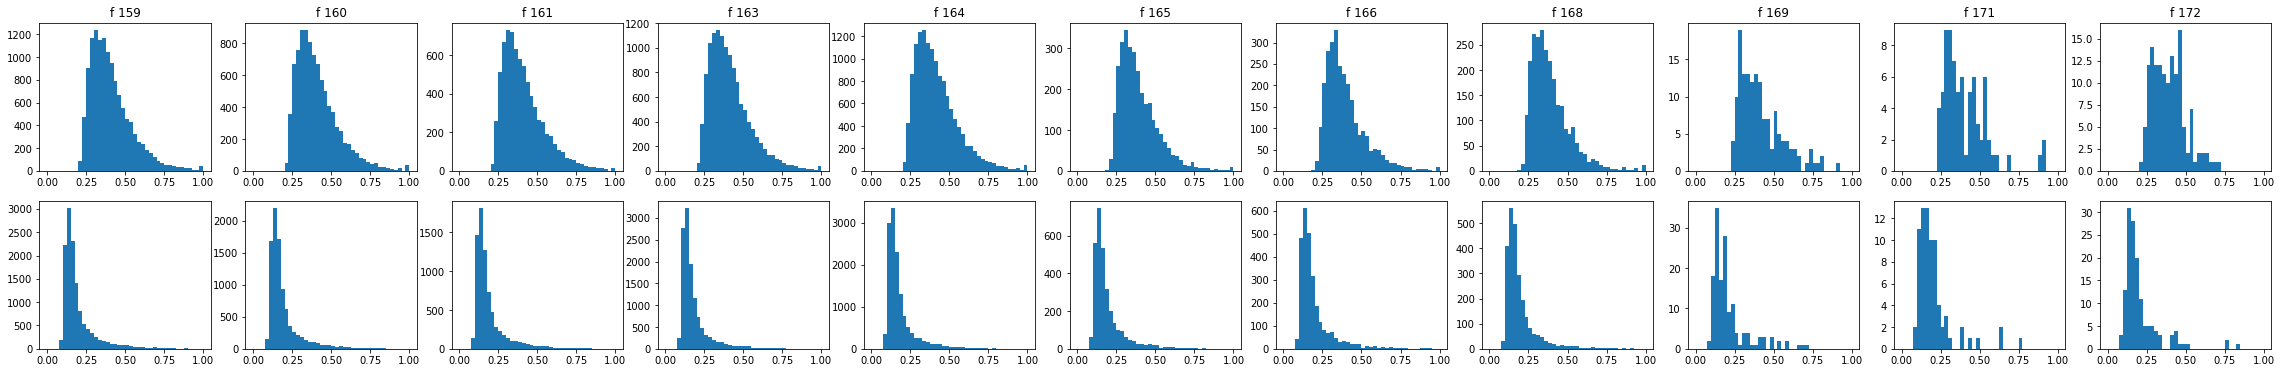

Channel 16


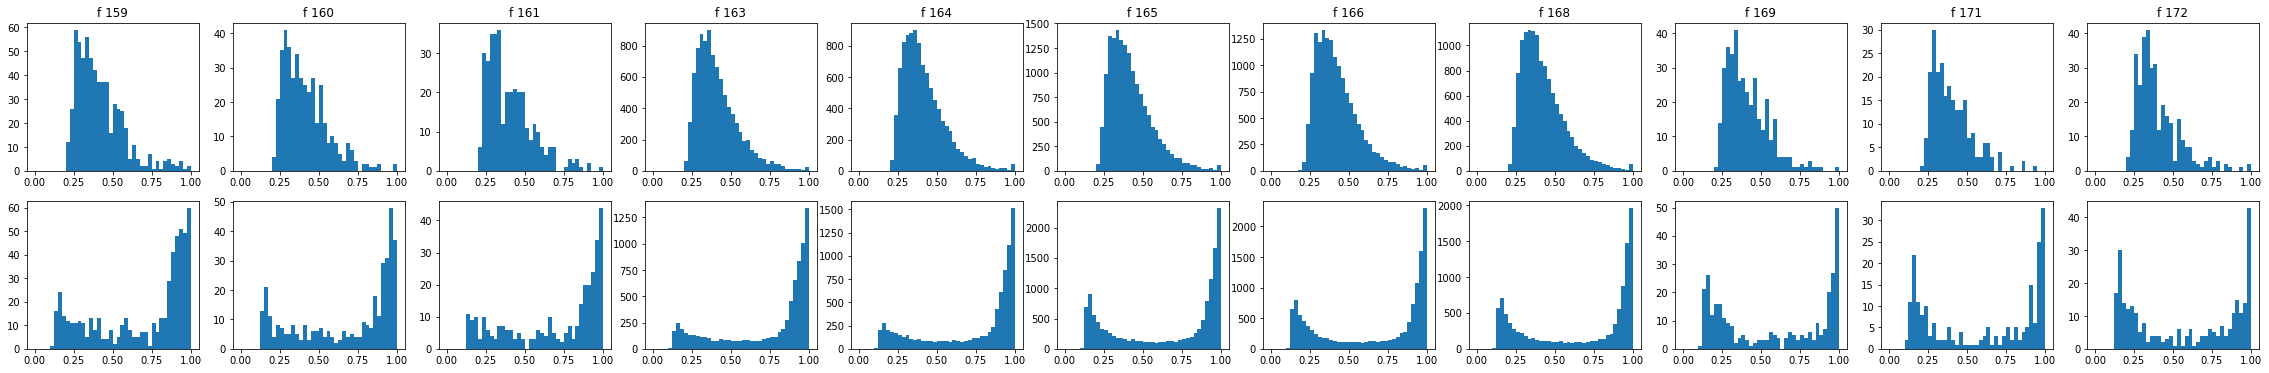

Channel 17


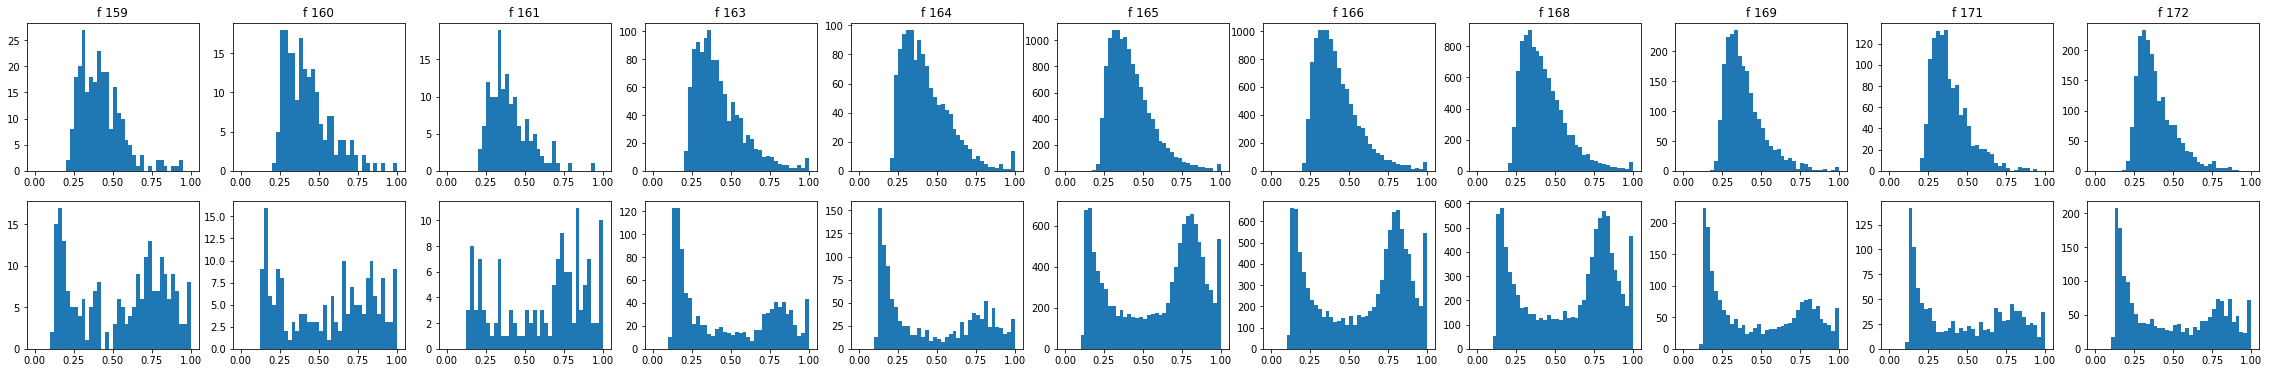

Channel 18


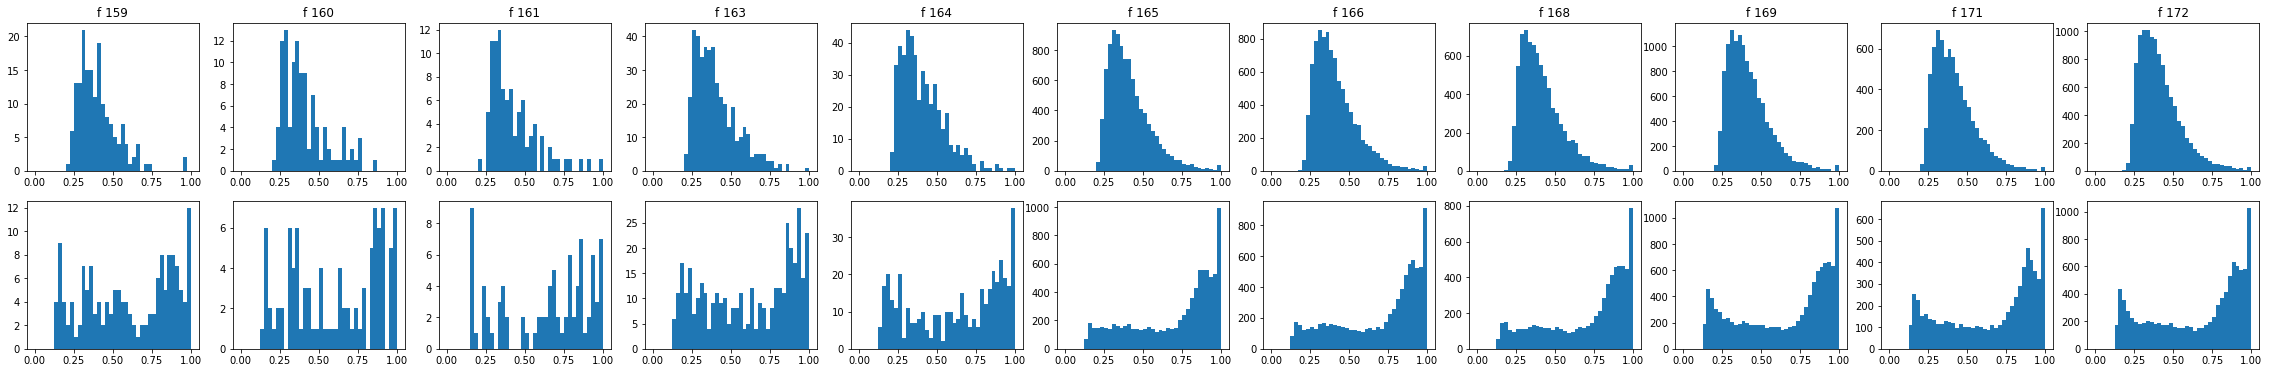

Channel 19


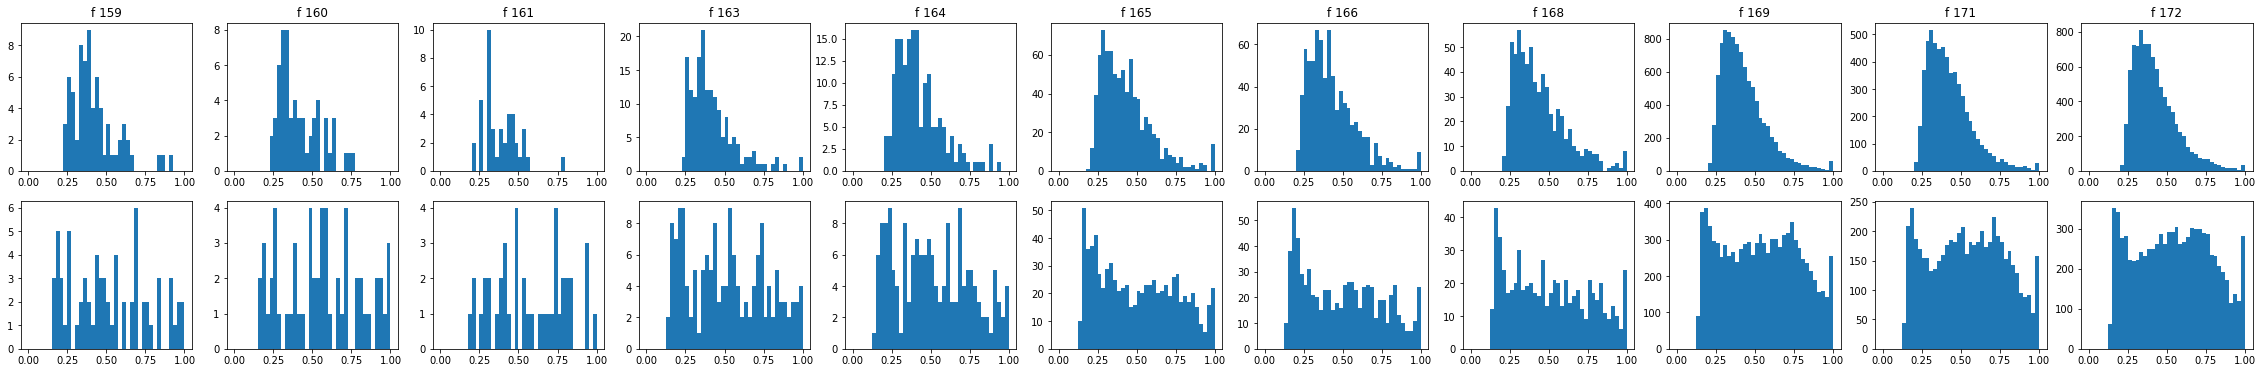

Channel 20


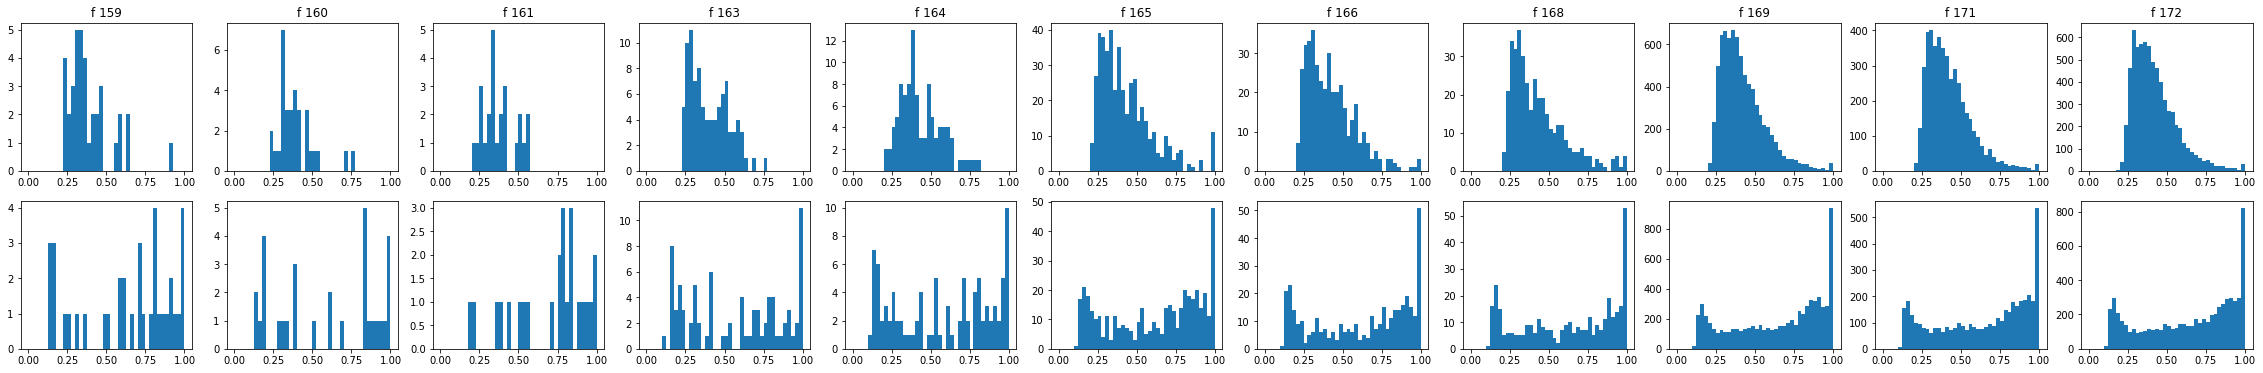

Channel 21


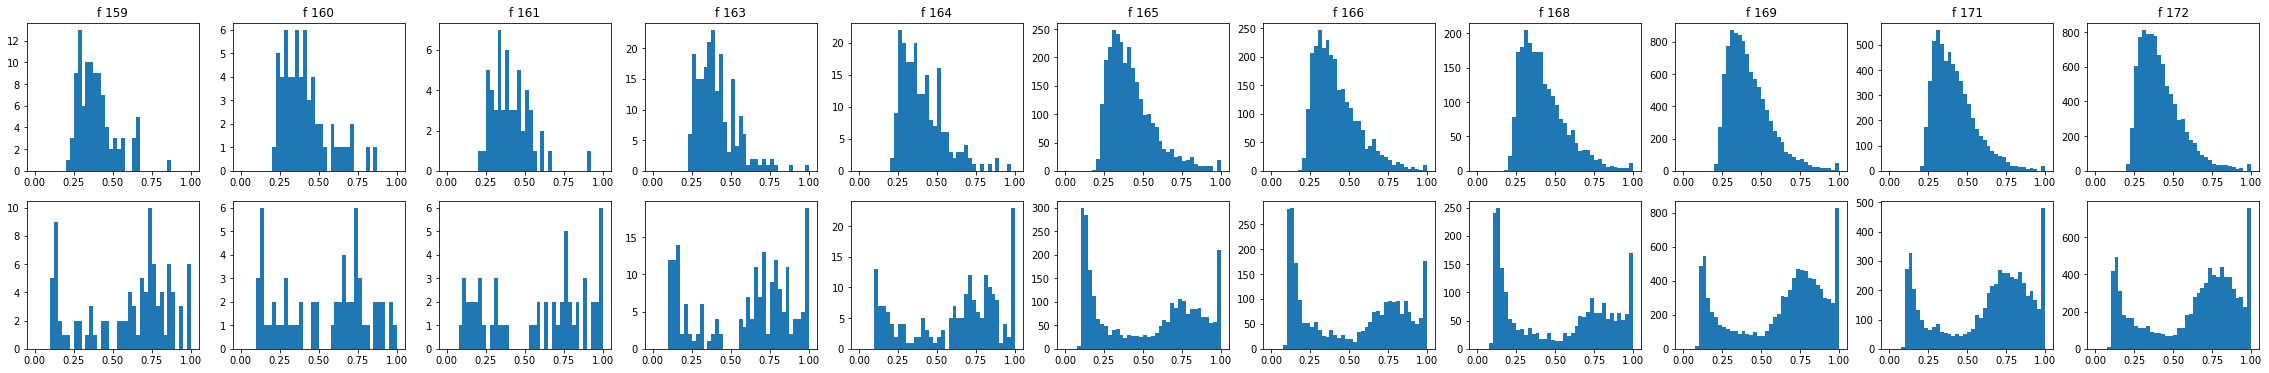

Channel 22


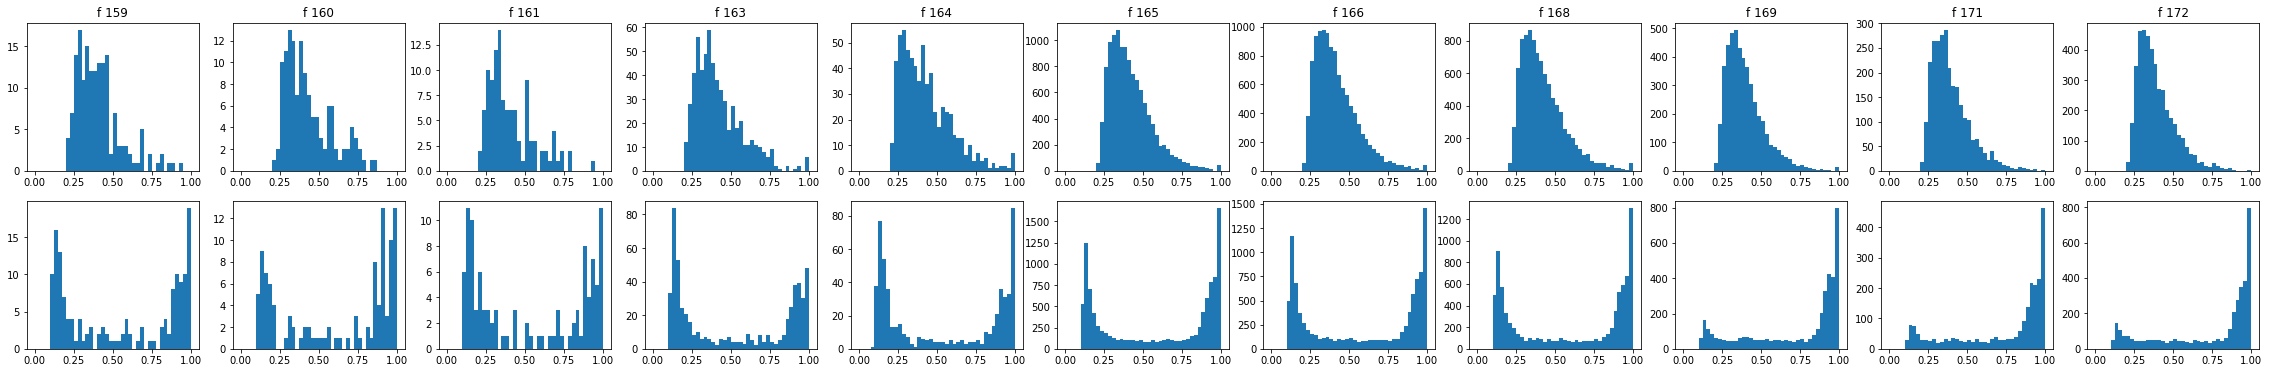

Channel 23


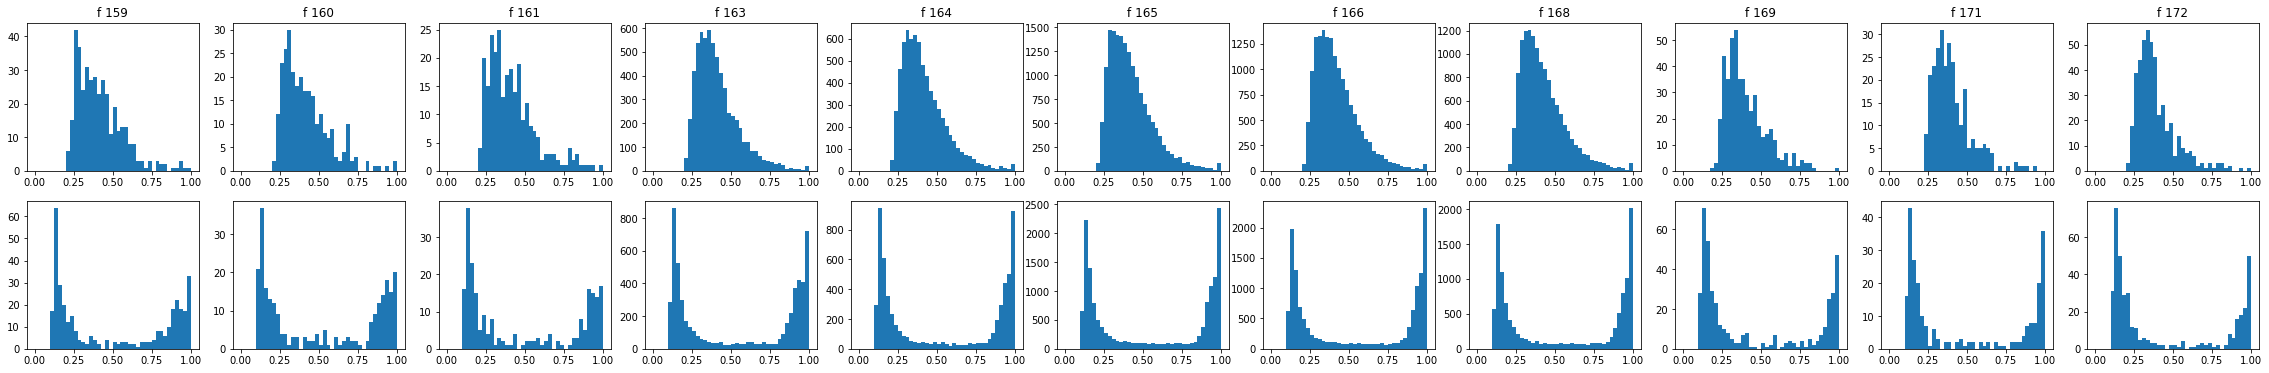

Channel 24


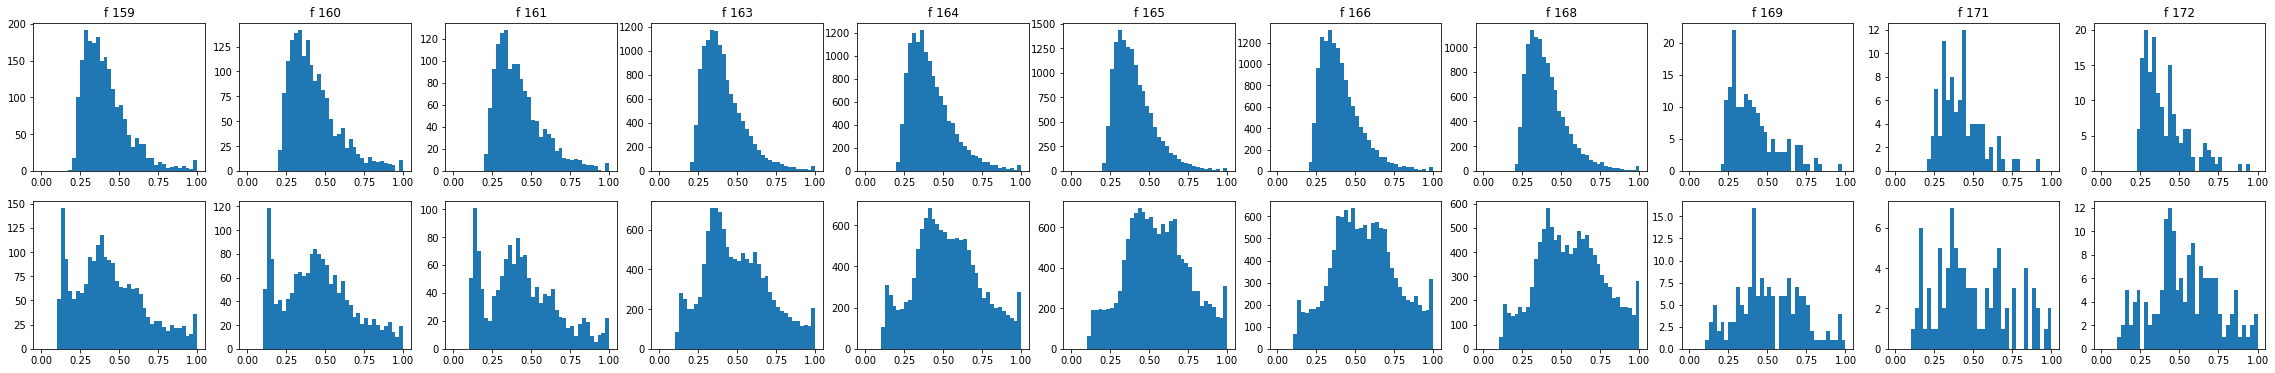

Channel 25


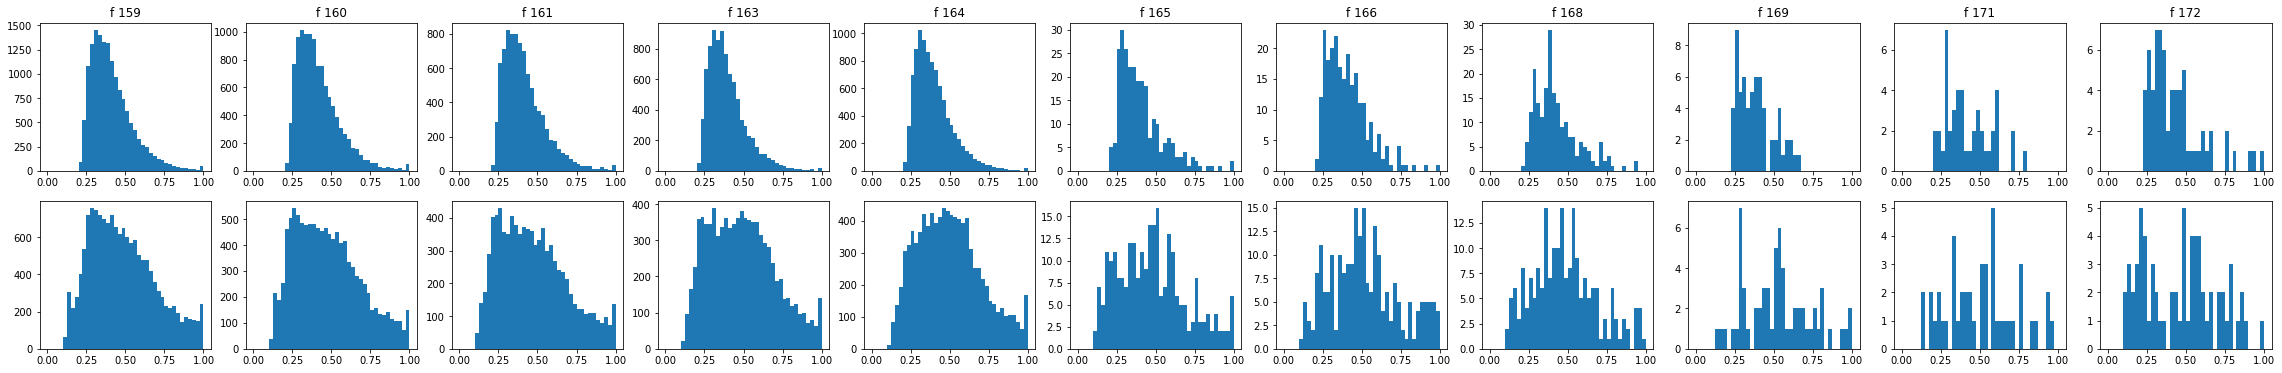

Channel 26


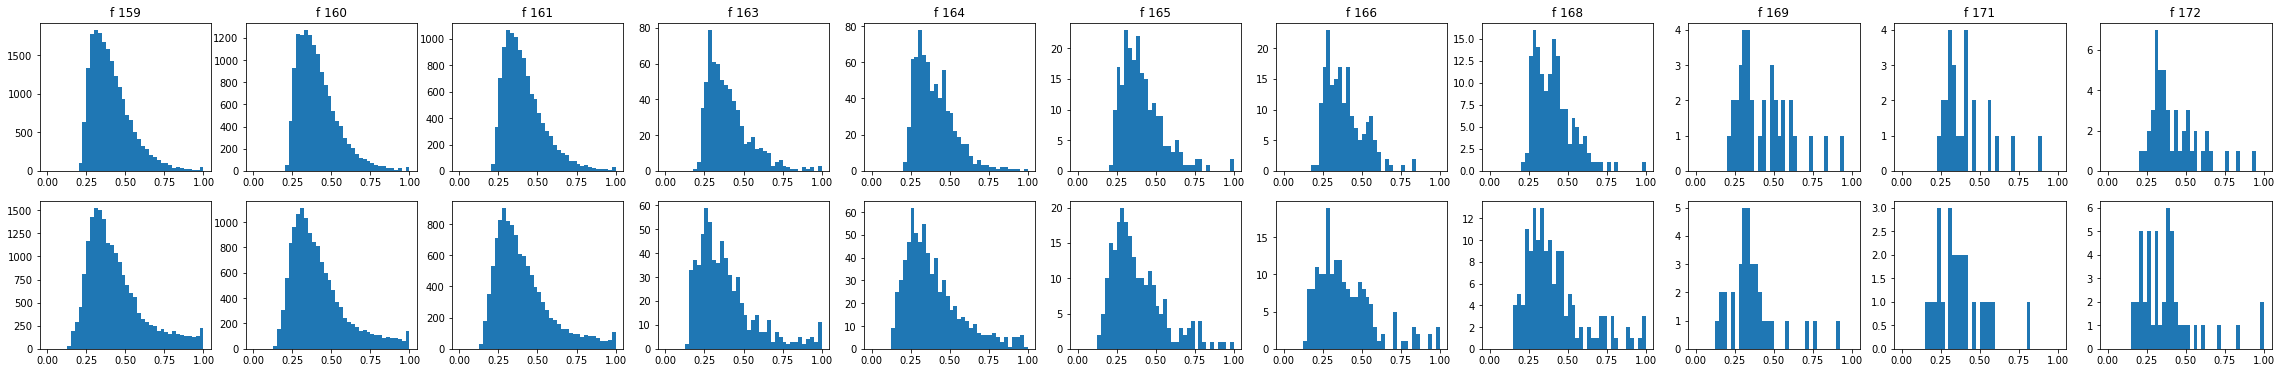

Channel 27


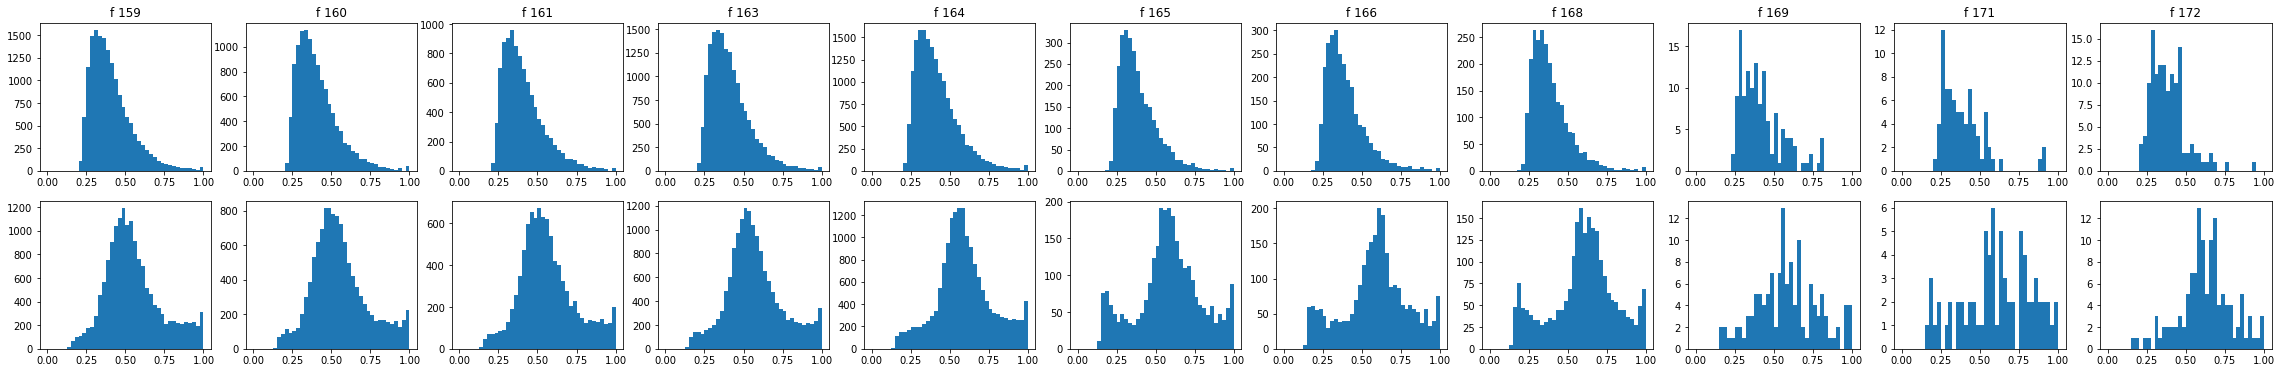

Channel 28


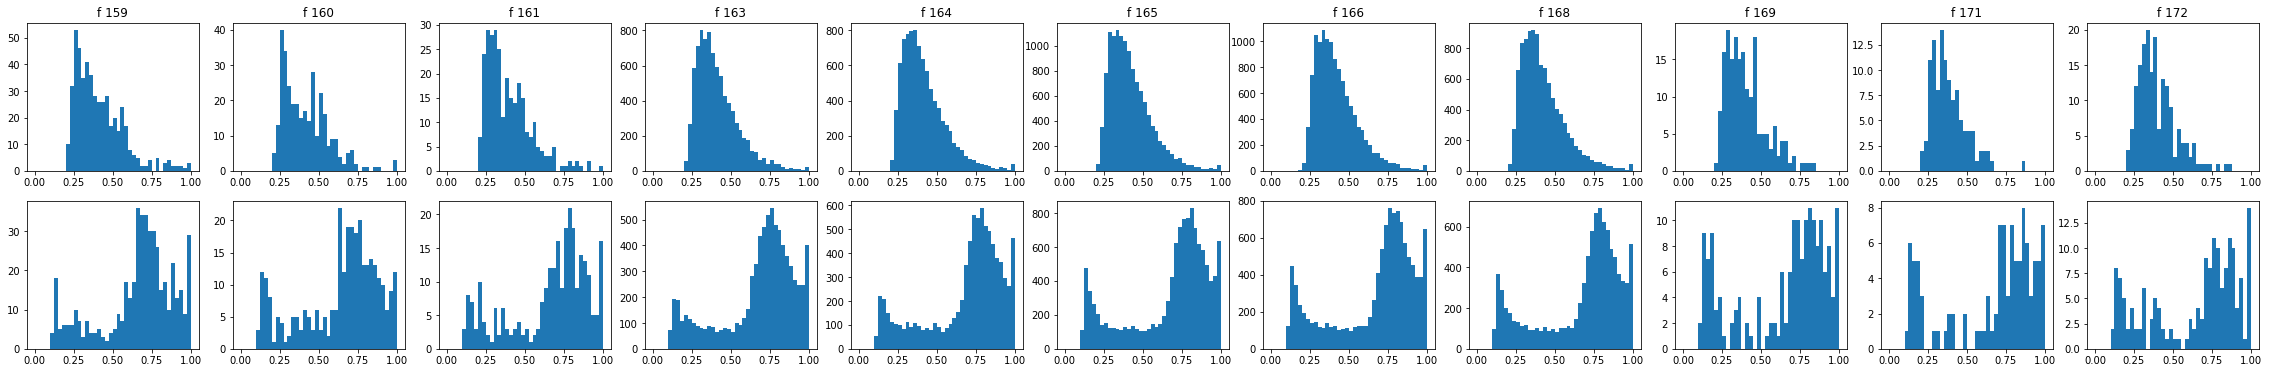

Channel 29


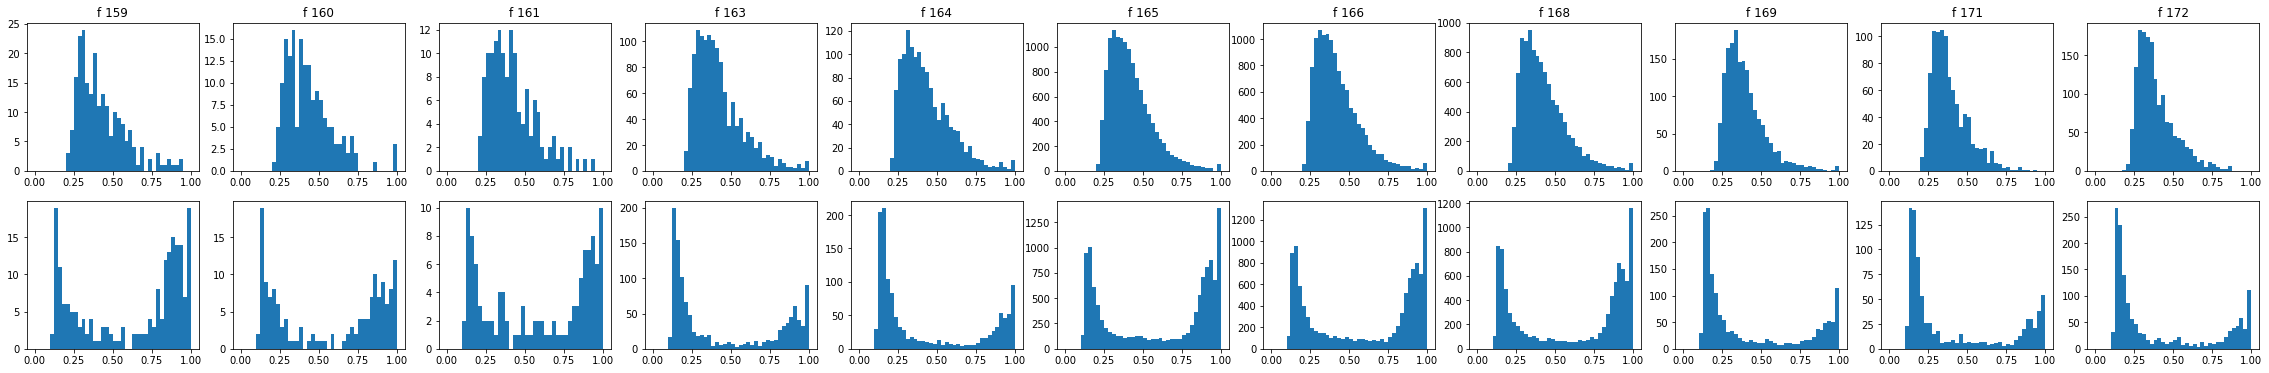

Channel 30


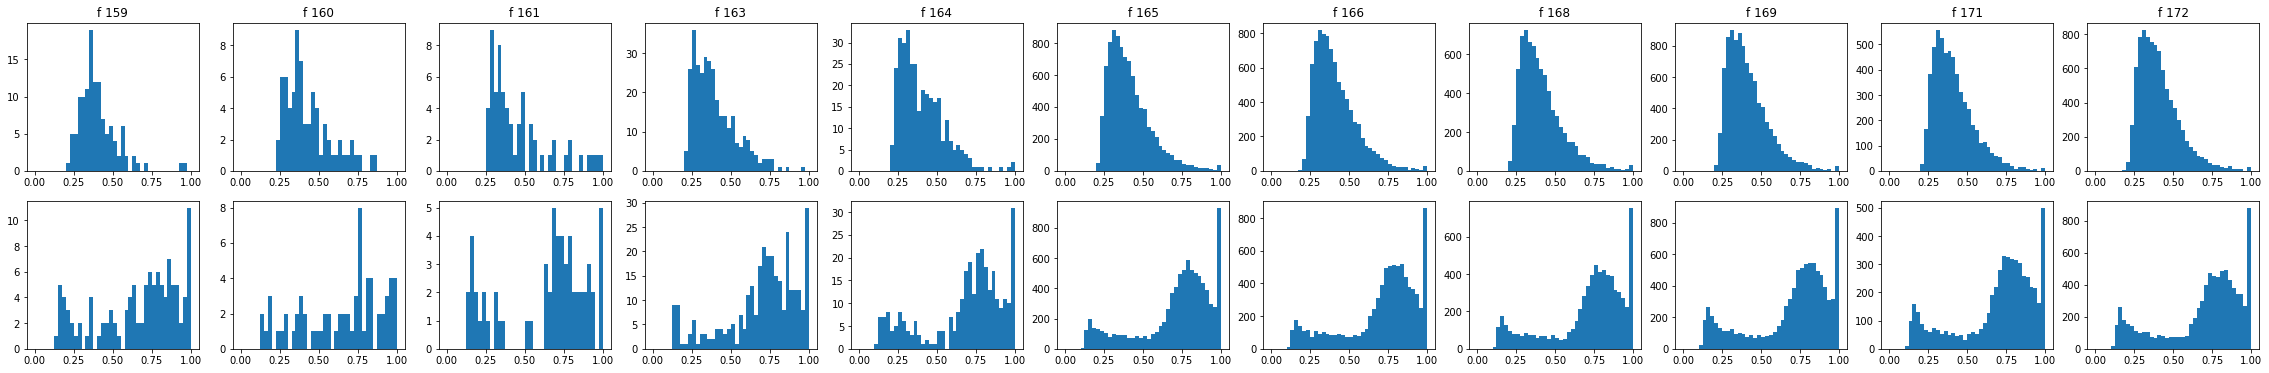

Channel 31


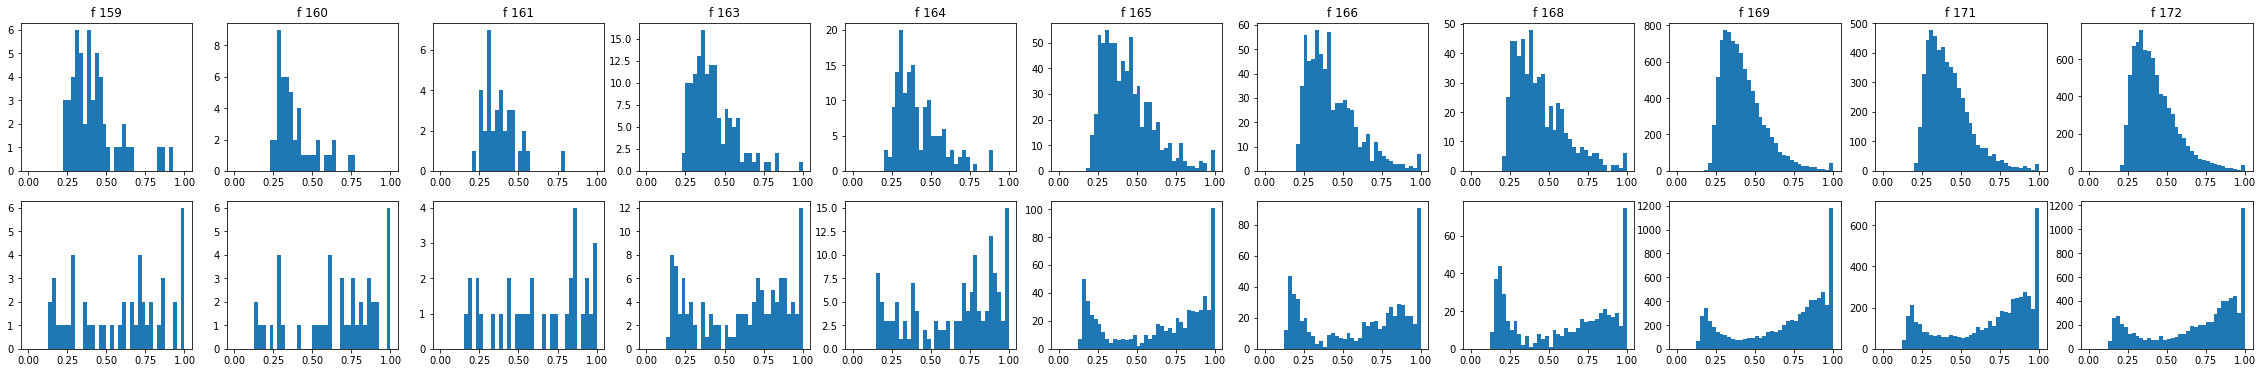

In [13]:
for channel in channels:
    print('=========================================================================================')
    print(f'Channel {channel}')
    print('=========================================================================================')
    
    plt.figure(figsize=(40, 6))
    n_files = len(file_channel_events)
    for i, channel_events in enumerate(file_channel_events):
        if channel not in channel_events:
            print(f'No channel {channel} in file {file_names[i][17:20]}')
            continue
        ampl_data = np.array(channel_events[channel]['sample_ampl'])
        
        plt.subplot(2, n_files, i + 1) # first row - channel 0
        plot_max_channel_hist(ampl_data[:, 0], n_bins=40, title=f'f {file_names[i][17:20]}', ylim=None)
        
        plt.subplot(2, n_files, n_files + i + 1) # second row - channel non-0
        plot_max_channel_hist(ampl_data[:, 1], n_bins=40, ylim=None)
        
    plt.show()